# Actividad: Redes Neuronales Profundas

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 4 de Octubre de 2023

---

## Ejercicio 1

**Instrucciones:**

El conjunto de datos CIFAR-10 es ampliamente utilizado en el campo de la visión por computadora y la clasificación de imágenes. Contiene un total de 60,000 imágenes a color de 32x32 píxeles, distribuidas en 10 clases diferentes, con 6,000 imágenes por clase. Estas imágenes están divididas en un conjunto de entrenamiento de 50,000 imágenes y un conjunto de prueba de 10,000 imágenes.

El objetivo de esta actividad es mejorar el desempeño del modelo desarrollado en clase (Base de datos Cifar10) para obtener una precisión mayor al 70%.


## Solución


En el presente notebook, abordamos una tarea de clasificación utilizando el conjunto de datos CIFAR-10. El objetivo principal es entrenar una red neuronal capaz de identificar y clasificar imágenes en una de las 11 clases diferentes. Estas clases se componen de objetos comunes y se dividen en las siguientes categorías: 'avión', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'sapo', 'caballo', 'barco' y 'camión'. Nuestro modelo se encargará de aprender a reconocer y asignar automáticamente una etiqueta a cada imagen de acuerdo a su contenido.

Importamos las librerías necesarias para dar solución al ejercicio.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

### Carga de datos y normalización

En primer lugar realizamos la carga de datos mediante la función `datasets.cifar10.load_data()`, la cual es proporcionada por la biblioteca de TensorFlow o Keras. Esta función devuelve dos conjuntos de datos: uno de entrenamiento y otro de prueba. Los conjuntos de entrenamiento y prueba se almacenan en las variables `train_images` y `train_labels` para el conjunto de entrenamiento, y `test_images` y `test_labels` para el conjunto de prueba.

Posteriormente realizamos la normalización de datos dividiendo todos los valores de píxeles en las imágenes de entrenamiento y prueba por 255. Esto tiene el efecto de escalar los valores de píxeles de cada imagen en el rango [0, 1], donde 0 representa el color negro (sin intensidad) y 1 representa el color blanco (máxima intensidad). 

La normalización implica escalar los valores de píxeles de las imágenes para que estén en un rango común y manejable, este paso es esencial para garantizar que el modelo de aprendizaje automático converja más rápido y se entrene de manera más eficiente.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalizar
train_images, test_images = train_images/255, test_images/255

### Visualización de Ejemplos de Entrenamiento

Definimos una lista de nombres de clases llamada `class_names`. Cada nombre de clase en esta lista corresponde a una de las 10 categorías en las que se clasifican las imágenes en el conjunto CIFAR-10. Estas clases son: 'Avión', 'Auto', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Barco' y 'Camión'

Posteriormente, utilizamos la librería Matplotlib para visualizar un conjunto de ejemplos de imágenes de entrenamiento. Se crea una figura de 10x10 (con 25 subtramas en total) y se recorre un bucle para mostrar 25 imágenes de ejemplos de entrenamiento junto con sus etiquetas correspondientes. Cada imagen se muestra en una subtrama de la figura, con el nombre de la clase etiquetado debajo de la imagen.

Esta visualización proporciona una idea inicial de cómo se ven las imágenes en el conjunto de entrenamiento y cómo se corresponden con sus etiquetas de clase.

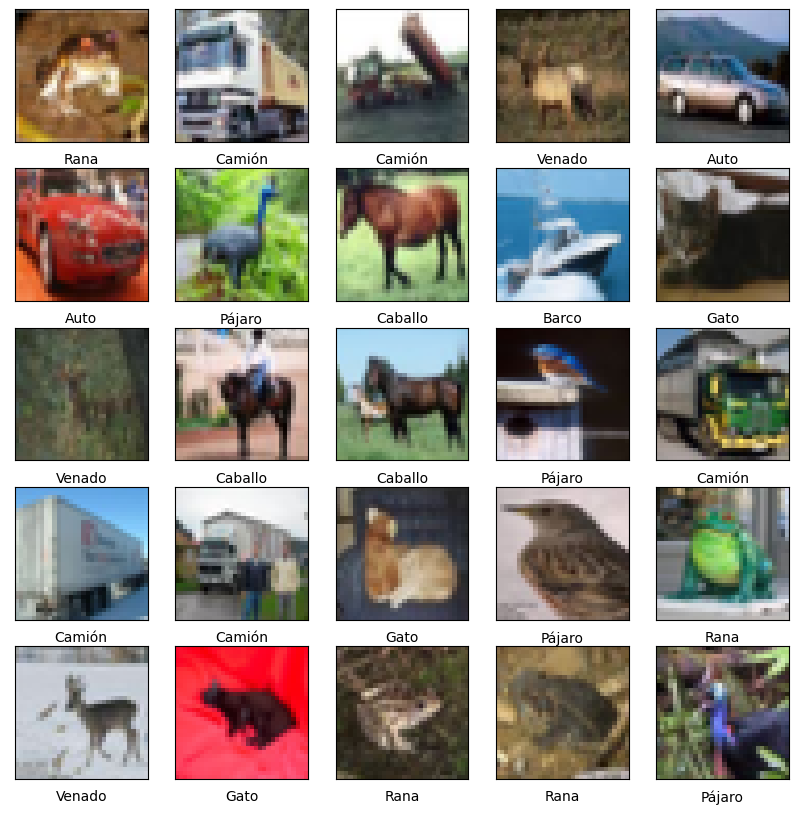

In [3]:
class_names=['Avión', 'Auto', 'Pájaro', 'Gato', 'Venado', 'Perro', 'Rana', 'Caballo', 'Barco', 'Camión']

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])

plt.show()

### Arquitectura de la Red Neuronal

A continuación, se define la arquitectura de una red neuronal convolutiva (CNN) utilizando la biblioteca Keras en un modelo secuencial. Esta CNN se diseñó específicamente para la clasificación de imágenes y es una parte fundamental en la tarea de procesamiento de imágenes en el conjunto de datos CIFAR-10.

   - **Modelo secuencial:** El objeto `model` se crea como una instancia de `models.Sequential()`. Un modelo secuencial es una pila lineal de capas en la que los datos fluyen en una sola dirección, desde la entrada hasta la salida. Esto se puede construir pasando una lista de capas al constructor del modelo secuencial.
   - **Capa Convolutiva 2D:** La CNN comienza con una capa de convolución bidimensional (`layers.Conv2D`) que tiene 32 filtros (también conocidos como kernels) de tamaño 3x3. Esta capa se encarga de realizar convoluciones en las imágenes de entrada para extraer características. La función de activación 'relu' (unidad lineal rectificada) se aplica después de cada convolución para introducir no linealidades en el modelo y mejorar su capacidad para aprender representaciones útiles de las imágenes. La forma de entrada del modelo se establece en `(32, 32, 3)`, lo que indica que se esperan imágenes de 32x32 píxeles con tres canales de color (rojo, verde y azul).
   - **Capa de Max Pooling:** Después de cada capa de convolución, se agrega una capa de max pooling (`layers.MaxPooling2D`). El max pooling es una técnica de submuestreo que reduce la dimensión espacial de las representaciones obtenidas después de la convolución. En este caso, se utiliza un max pooling de tamaño 2x2 para reducir la resolución espacial a la mitad. Esto ayuda a disminuir la cantidad de parámetros en el modelo y a controlar el sobreajuste.
   - **Capas de convolución adicionales:** El modelo sigue con dos capas de convolución adicionales, cada una con 64 filtros de tamaño 3x3. Estas capas siguen el mismo patrón que la primera capa de convolución: aplican convoluciones, seguidas de la función de activación 'relu', y luego una capa de max pooling de 2x2. Estas capas adicionales permiten al modelo aprender representaciones de características más complejas a medida que profundiza en la red.

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))

Posteriormente, se presenta un resumen del modelo de red neuronal convolutiva (CNN) utilizando el método `model.summary()`. Este resumen proporciona información clave sobre la arquitectura de la red, incluyendo el número de parámetros en cada capa y la forma de salida de cada capa.

El modelo tiene un total de 56,320 parámetros entrenables distribuidos en sus capas. No contiene parámetros no entrenables. La forma de salida final después de la tercera capa convolucional es `(4, 4, 64)`.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

### Capas completamente conectadas o densas

A continuación se realiza una actualización en la arquitectura del modelo de red neuronal convolutiva (CNN) mediante la adición de capas adicionales de aplanado (`Flatten`) y capas completamente conectadas (`Dense`). 

   - **Capa Flatten (flatten):** Esta capa de aplanado se utiliza después de la última capa convolucional. Su función es transformar la salida tridimensional de la última capa convolucional (4, 4, 64) en un vector unidimensional de tamaño 1024. Esto permite que la salida de la última capa convolucional se pase a las capas completamente conectadas.
   - **Capa Dense (dense):** Esta es la primera capa completamente conectada que sigue a la capa de aplanado. Tiene 60 neuronas y utiliza la función de activación 'relu'. Esta capa contiene 61,500 parámetros entrenables. Este valor fue modificado para obtener una precisión mayor al 70% (originalmente su valor era 54).
   - **Capa Dense (dense_1):** La segunda capa completamente conectada tiene 20 neuronas. Utiliza la función de activación 'sigmoid' y contiene 1,220 parámetros entrenables. Este valor igualmente fue modificado para obtener una precisión mayor al 70% (originalmente su valor era 10, por las 10 clases de imágenes que se tienen).

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(60, activation = 'relu'))
model.add(layers.Dense(20, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

### Compilación del modelo

La compilación de un modelo es una etapa esencial antes de comenzar el entrenamiento. En esta etapa, se configuran aspectos importantes del proceso de entrenamiento, como el optimizador, la función de pérdida y las métricas de evaluación. El código utiliza los siguientes argumentos en la función `model.compile`:

   - `optimizer='adam'`: Se utiliza el optimizador Adam, que es una variante del descenso de gradiente estocástico (SGD) que se adapta automáticamente a la velocidad de aprendizaje durante el entrenamiento.
   - `loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)`: Se especifica la función de pérdida, que en este caso es la entropía cruzada categórica dispersa (Sparse Categorical Crossentropy). El parámetro `from_logits=True` indica que las salidas del modelo no están normalizadas y se aplicará una función softmax antes de calcular la pérdida.
   - `metrics=['accuracy']`: Se selecciona la métrica de evaluación, que en este caso es la exactitud (accuracy). Esto significa que durante el entrenamiento, el modelo calculará y mostrará la exactitud en el conjunto de entrenamiento y el conjunto de validación en cada época.

In [7]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Entrenamiento del modelo**

El entrenamiento del modelo se realiza mediante la función `model.fit`. Los siguientes argumentos se utilizan en esta función:

   - `train_images` y `train_labels`: Estos son los datos de entrenamiento de las imágenes y las etiquetas correspondientes.
   - `epochs=10`: El modelo se entrena durante 15 épocas. Una época es una iteración sobre todo el conjunto de datos de entrenamiento. Este valor fue modificado para obtener una precisión mayor al 70% (originalmente su valor era de 10 épocas).
   - `validation_data=(test_images, test_labels)`: Se especifica el conjunto de validación, que en este caso es el conjunto de prueba (`test_images` y `test_labels`). Esto significa que durante el entrenamiento, el modelo calculará y mostrará la exactitud en el conjunto de entrenamiento y el conjunto de prueba en cada época.

In [8]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15


/Users/alfonsopineda/Library/Python/3.9/lib/python/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 14s 9ms/step - loss: 1.5822 - accuracy: 0.4222 - val_loss: 1.3377 - val_accuracy: 0.5178
Epoch 2/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1956 - accuracy: 0.5733 - val_loss: 1.1034 - val_accuracy: 0.6096
Epoch 3/15
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0448 - accuracy: 0.6321 - val_loss: 1.0223 - val_accuracy: 0.6330
Epoch 4/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9432 - accuracy: 0.6679 - val_loss: 0.9686 - val_accuracy: 0.6633
Epoch 5/15
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8658 - accuracy: 0.6982 - val_loss: 0.8853 - val_accuracy: 0.6923
Epoch 6/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8096 - accuracy: 0.7168 - val_loss: 0.8680 - val_accuracy: 0.6948
Epoch 7/15
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7615 - accuracy: 0.7353 - val_loss: 0.8415 - val_accuracy: 0.

### Gráfica de Precisión durante el Entrenamiento

El siguiente código genera una gráfica de la exactitud del modelo en el conjunto de entrenamiento y el conjunto de prueba durante el entrenamiento. La gráfica muestra que la exactitud del modelo en el conjunto de entrenamiento aumenta con cada época, mientras que la exactitud en el conjunto de prueba se estabiliza después de la séptima época. Esto indica que el modelo se está sobreajustando al conjunto de entrenamiento después de la séptima época.

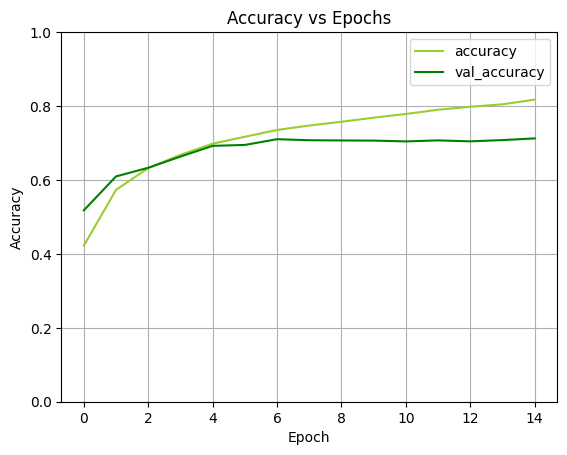

In [9]:
plt.plot(history.history['accuracy'], label='accuracy', color='yellowgreen')
plt.plot(history.history['val_accuracy'], label='val_accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.title('Accuracy vs Epochs')
plt.legend()
grd = plt.grid(True)

Por último, se realiza la predicción de una imagen individual del conjunto de prueba y se muestra la imagen junto con la etiqueta predicha y la probabilidad correspondiente. 

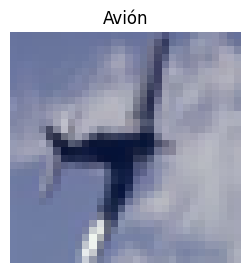

In [29]:
n = 116  # Imagen a predecir
plt.figure(figsize=(3,3))
plt.imshow(test_images[n])
plt.axis('off')
plt.title(class_names[test_labels[n][0]])
plt.show()

Se utiliza el modelo entrenado para hacer predicciones en todo el conjunto de prueba (`test_images`). Esto generará un conjunto de predicciones para todas las imágenes del conjunto de prueba. 

Posteriormente, se imprime en la consola las predicciones específicas para la imagen en el índice `n`. Estas predicciones son un vector de probabilidades que representan la probabilidad estimada de que la imagen pertenezca a cada una de las 10 clases.

Por útlimo, calculamos y mostramos en la consola la clase predicha y su probabilidad correspondiente para la imagen en el índice `n`. Esto se hace tomando la clase con la probabilidad más alta (argmax) en el vector de predicciones y mostrando la probabilidad en formato de porcentaje.

In [28]:
predictions = model.predict(test_images)
print(predictions[n])

print("La imagen pertenece al grupo {} con una probabilidad de {:.2f} %"
      .format(class_names[np.argmax(predictions[n])], 100 * np.max(predictions[n])))

313/313 [==============================] - 1s 2ms/step
[9.9999803e-01 7.7114040e-01 9.9347699e-01 7.7789682e-01 8.0786002e-01
 2.1501305e-02 1.5028428e-04 8.1832093e-01 9.5761764e-01 8.2022321e-01
 8.3745267e-15 1.7867877e-19 3.2088961e-13 6.7108434e-15 9.9982075e-16
 2.1984700e-15 3.9497824e-16 2.0186457e-15 1.7299869e-13 4.8392189e-12]
La imagen pertenece al grupo Avión con una probabilidad de 100.00 %


## Conclusiones

En el presente ejercicio, se realizó la clasificación de imágenes en el conjunto de datos CIFAR-10 mediante una red neuronal convolutiva (CNN). El modelo de CNN se diseñó utilizando la biblioteca Keras en un modelo secuencial. El modelo se entrenó durante 15 épocas y se logró una precisión del 71.24% en el conjunto de entrenamiento. 

Además, se realizó la predicción de una imagen individual del conjunto de prueba y se mostró la imagen junto con la etiqueta predicha y la probabilidad correspondiente. El modelo predijo correctamente la clase de la imagen con una probabilidad del 100%.


--- 

Alfonso Pineda Cedillo | A01660394